# Задача 8. Сравнение методов классификации

** **Дедлайн**: 28.11.2025, 23:59
* Полный балл: 15

## Задача

- [X] Найти данные, на которых интересно будет решать задачу классификации (больше `1000` строк, больше `5` признаков).
- [X] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [X] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- [X] При необходимости выполнить полезные преобразования данных (например, трансформировать категориальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [X] Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания для библиотечных реализаций (например, из **sklearn**) четырёх методов классификации.
- [X] Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

# Импорт библиотек

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

### Найти данные, на которых интересно будет решать задачу классификации (больше `1000` строк, больше `5` признаков).

##### Данные, на основе которых будем решать - winequality-red

### Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).

In [97]:
df = pd.read_csv("winequality-red.csv", delimiter=';')

In [98]:
df.shape

(1599, 12)

In [99]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [100]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [101]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [102]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [103]:
df['quality'].value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

In [104]:
df['target'] = (df['quality'] >= 6).astype(int)
df['target'].value_counts()

target
1    855
0    744
Name: count, dtype: int64

In [105]:
df_clean = df.copy()
df_clean = df_clean.drop('quality', axis=1)

print("Анализ выбросов (IQR метод):")
for col in numeric_cols:
    if col != 'target':
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df_clean[col] < (Q1 - 1.5 * IQR)) | (df_clean[col] > (Q3 + 1.5 * IQR))).sum()
        print(f"{col}: {outliers} выбросов")

Анализ выбросов (IQR метод):
fixed acidity: 49 выбросов
volatile acidity: 19 выбросов
citric acid: 1 выбросов
residual sugar: 155 выбросов
chlorides: 112 выбросов
free sulfur dioxide: 30 выбросов
total sulfur dioxide: 55 выбросов
density: 45 выбросов
pH: 35 выбросов
sulphates: 59 выбросов
alcohol: 13 выбросов


In [106]:
df_clean.shape

(1599, 12)

### Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.

In [107]:
plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

Text(0.5, 1.0, 'Распределение качества вина')

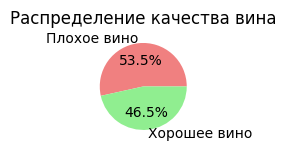

In [108]:
plt.subplot(3, 3, 1)
target_counts = df_clean['target'].value_counts()
plt.pie(target_counts.values, labels=['Плохое вино', 'Хорошее вино'], 
        autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Распределение качества вина')

#### Вывод: Данные хорошо сбалансированны, соотношение плохого и хорошего вина стремится к 1/2

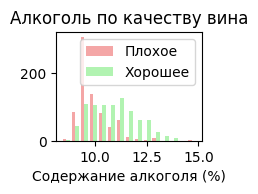

In [111]:
plt.subplot(3, 3, 5)
good_wine = df_clean[df_clean['target'] == 1]
bad_wine = df_clean[df_clean['target'] == 0]
plt.hist([bad_wine['alcohol'], good_wine['alcohol']], 
         bins=15, color=['lightcoral', 'lightgreen'], 
         label=['Плохое', 'Хорошее'], alpha=0.7)
plt.title('Алкоголь по качеству вина')
plt.xlabel('Содержание алкоголя (%)')
plt.legend()

#### Вывод: Хорошее вино часто имеет более высокое содержания алкоголя

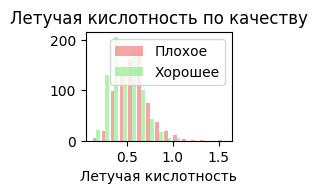

In [112]:
plt.subplot(3, 3, 6)
plt.hist([bad_wine['volatile acidity'], good_wine['volatile acidity']], 
         bins=15, color=['lightcoral', 'lightgreen'], 
         label=['Плохое', 'Хорошее'], alpha=0.7)
plt.title('Летучая кислотность по качеству')
plt.xlabel('Летучая кислотность')
plt.legend()

#### Вывод: Плохое вино имеют более высокую летучую кислотность

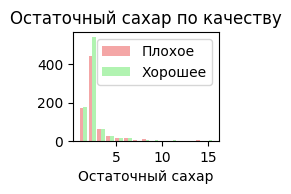

In [113]:
plt.subplot(3, 3, 7)
plt.hist([bad_wine['residual sugar'], good_wine['residual sugar']], 
         bins=15, color=['lightcoral', 'lightgreen'], 
         label=['Плохое', 'Хорошее'], alpha=0.7)
plt.title('Остаточный сахар по качеству')
plt.xlabel('Остаточный сахар')
plt.legend()

#### Вывод: Остаточный сахар не помогает выявить закономерность, не ключевой фактор

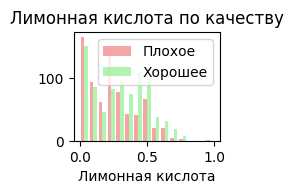

In [114]:
plt.subplot(3, 3, 8)
plt.hist([bad_wine['citric acid'], good_wine['citric acid']], 
         bins=15, color=['lightcoral', 'lightgreen'], 
         label=['Плохое', 'Хорошее'], alpha=0.7)
plt.title('Лимонная кислота по качеству')
plt.xlabel('Лимонная кислота')
plt.legend()

#### Вывод: Хорошее вино имеет немного большее содержание лимонной кислоты

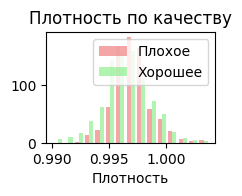

In [115]:
plt.subplot(3, 3, 9)
plt.hist([bad_wine['density'], good_wine['density']], 
         bins=15, color=['lightcoral', 'lightgreen'], 
         label=['Плохое', 'Хорошее'], alpha=0.7)
plt.title('Плотность по качеству')
plt.xlabel('Плотность')
plt.legend()

plt.tight_layout()
plt.show()

#### Вывод: Хорошее вино часто имеет более низкую плотность

#### Вывод: Хорошие предикторы
- Алкоголь
- Летучая кислотность
- Плотность

### При необходимости выполнить полезные преобразования данных (например, трансформировать категориальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).

In [116]:
df_final = df_clean.copy()

In [130]:
df_final['alcohol_high'] = (df_final['alcohol'] > 12.5).astype(int)
df_final['volatile_acidity_low'] = (df_final['volatile acidity'] < 0.6).astype(int)
df_final['density_low'] = (df_final['density'] < 0.995).astype(int)
df_final['citric_acid_high'] = (df_final['citric acid'] > 0.3).astype(int)
df_final['ph_low'] = (df_final['pH'] < 3.3).astype(int)

In [131]:
df_final['alcohol_sugar_ratio'] = df_final['alcohol'] / (df_final['residual sugar'] + 0.1)
df_final['acidity_balance'] = df_final['fixed acidity'] / (df_final['volatile acidity'] + 0.1)
df_final['sulfur_ratio'] = df_final['free sulfur dioxide'] / (df_final['total sulfur dioxide'] + 0.1)

In [133]:
df_final = df_final.drop(['residual sugar'], axis=1)

##### Было проведено Feature Engineering для признаков, добавлены новые важные, удалены ненужные

In [135]:
df_final.shape

(1599, 19)

### Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания для библиотечных реализаций (например, из **sklearn**) четырёх методов классификации.

In [136]:
X = df_final.drop('target', axis=1)
y = df_final['target']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [138]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [139]:
X_train.shape, X_test.shape, y_train.mean(), y_test.mean()

((1279, 18), (320, 18), np.float64(0.5347928068803753), np.float64(0.534375))

In [140]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5]
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    }
}

In [141]:
best_models = {}
cv_results = []

for name, config in models.items():
    print(f"\n--- Обучение {name} ---")
    
    grid_search = GridSearchCV(
        config['model'], config['params'], cv=5, scoring='f1', n_jobs=-1
    )
    grid_search.fit(X_train_scaled, y_train)
    
    best_models[name] = grid_search.best_estimator_
    cv_results.append({
        'Model': name,
        'Best CV Score': grid_search.best_score_,
        'Best Params': grid_search.best_params_
    })
    
    print(f"Лучшие параметры: {grid_search.best_params_}")
    print(f"Лучший F1-score (CV): {grid_search.best_score_:.4f}")

cv_df = pd.DataFrame(cv_results)
print("\nРезультаты кросс-валидации:")
print(cv_df.to_string(index=False))


--- Обучение Logistic Regression ---
Лучшие параметры: {'C': 0.1, 'solver': 'lbfgs'}
Лучший F1-score (CV): 0.7550

--- Обучение Random Forest ---
Лучшие параметры: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Лучший F1-score (CV): 0.8179

--- Обучение SVM ---
Лучшие параметры: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Лучший F1-score (CV): 0.7687

--- Обучение KNN ---
Лучшие параметры: {'n_neighbors': 7, 'weights': 'distance'}
Лучший F1-score (CV): 0.7887

Результаты кросс-валидации:
              Model  Best CV Score                                                    Best Params
Logistic Regression       0.755019                                  {'C': 0.1, 'solver': 'lbfgs'}
      Random Forest       0.817944 {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
                SVM       0.768731                    {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
                KNN       0.788674                      {'n_neighbors': 7, 'weights': 'distance'}


 ### Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

In [142]:
results = []

for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })
    
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

results_df = pd.DataFrame(results)
print("\nСравнение моделей:")
print(results_df.to_string(index=False))


Logistic Regression:
Accuracy: 0.74
Precision: 0.77
Recall: 0.74
F1-Score: 0.75

Random Forest:
Accuracy: 0.79
Precision: 0.81
Recall: 0.80
F1-Score: 0.80

SVM:
Accuracy: 0.77
Precision: 0.81
Recall: 0.73
F1-Score: 0.77

KNN:
Accuracy: 0.79
Precision: 0.80
Recall: 0.82
F1-Score: 0.81

Сравнение моделей:
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.740625   0.768293 0.736842  0.752239
      Random Forest  0.793750   0.814371 0.795322  0.804734
                SVM  0.765625   0.811688 0.730994  0.769231
                KNN  0.793750   0.800000 0.818713  0.809249


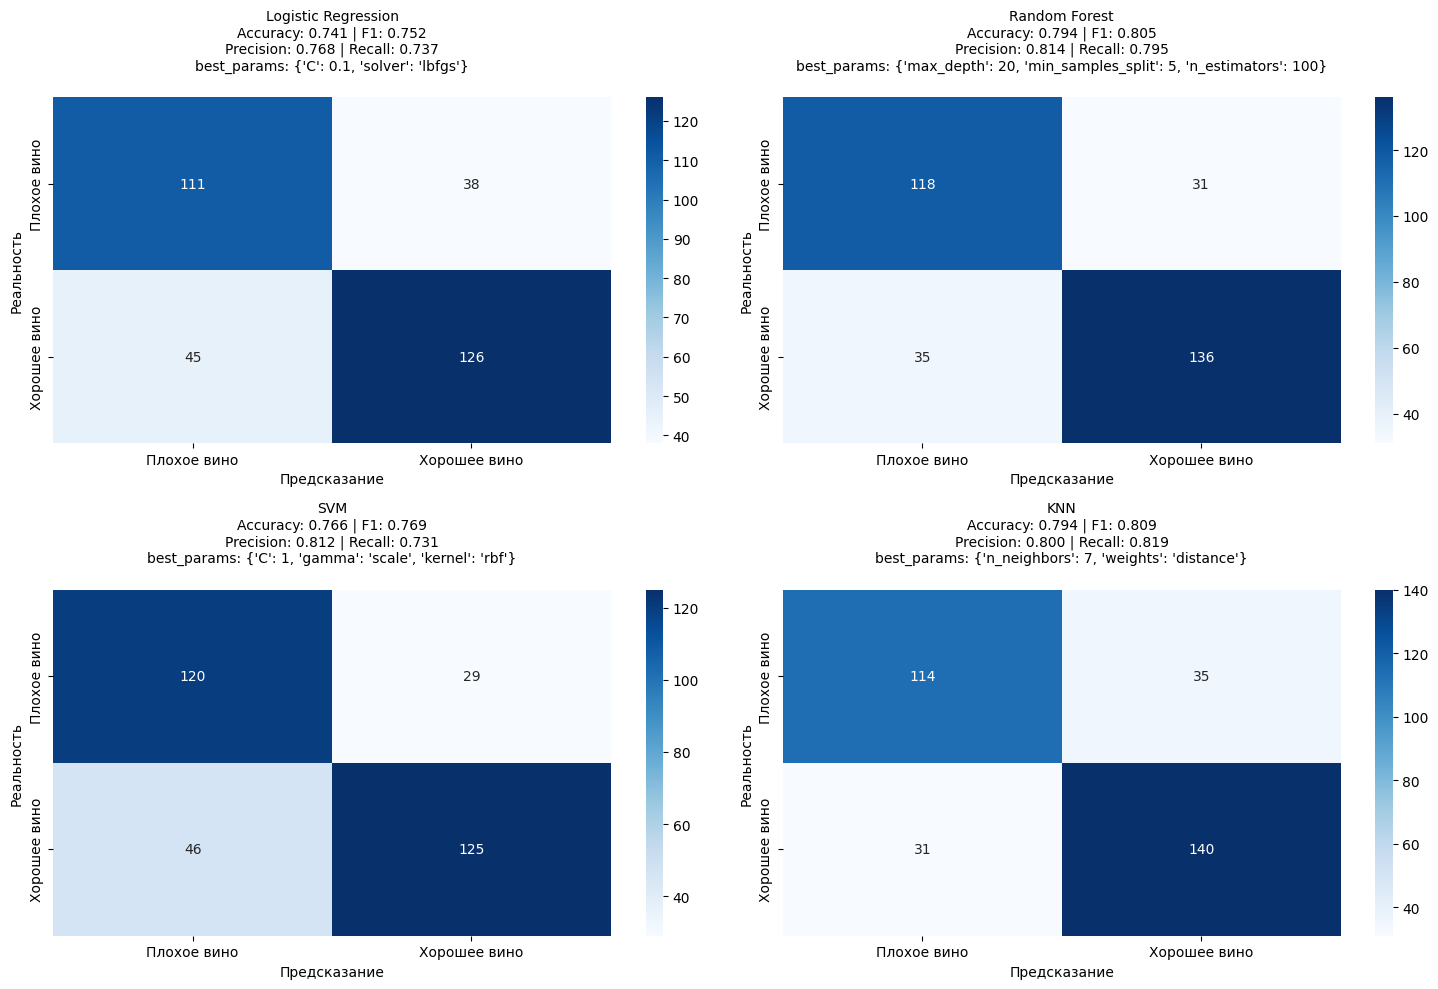

In [143]:
plt.figure(figsize=(15, 10))

for i, model_name in enumerate(best_models.keys(), 1):
    plt.subplot(2, 2, i)
    
    model = best_models[model_name]
    y_pred = model.predict(X_test_scaled)
    
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Плохое вино', 'Хорошее вино'],
                yticklabels=['Плохое вино', 'Хорошее вино'])
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    grid_search = GridSearchCV(
        models[model_name]['model'], 
        models[model_name]['params'], 
        cv=5, scoring='f1'
    )
    grid_search.fit(X_train_scaled, y_train)
    best_params = grid_search.best_params_
    
    plt.title(f'{model_name}\nAccuracy: {accuracy:.3f} | F1: {f1:.3f}\nPrecision: {precision:.3f} | Recall: {recall:.3f}\nbest_params: {best_params}', 
              pad=20, fontsize=10)
    plt.xlabel('Предсказание')
    plt.ylabel('Реальность')

plt.tight_layout()
plt.show()

### Вывод: 
- KNN имеет лучшую точность: 0.794, и F1-score: 0.809, лучше всех угадывает хорошее вино, 2 место из моделей по предсказанию плохого вина, имеет самое низкое количество неправильных предсказаний хорошего вина, 3 место по неправильным предсказаниям плохого. Лучший вариант
- Random Forest такая же точность, как у KNN: 0.794, и F1-score: 0.805, хороший вариант.
- SVM вариант, результаты которого похожи на Random Forest, точность: 0.766, F1-score: 0.769, также хороший вариант
- Logistic Regression самый худший вариант из представленных, самые худшие результаты предсказания как ложных, так и правильных. Точность: 0.741, F1-score: 0.752. Однако вариант остается неплохим, но хуже остальных


KNN Остается лучшим вариантом для нас, имеет низкое количество ложных предсказаний, отличную точность.